In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Shreya549/no-phishy/master/final2.csv")

In [5]:
df.head()

,raw_length,https,countSubdomain,brandName,countBrand,countRandom,smallestWord,largestWord,avgWord,keyword Count,sd of words,com,www,tld,pathLen,subdomainLen,domainLen,Alexa_top_1m,domain_gibb,dash,dot,slash,at,question,ampersand,equal,underscore,countDigitSub,countDigitDom,countDigitPath,PhishingResult
0,10,0,1,0,0,2,2,11,4,2,2.63,1,1,1,19,3,14,1,1,4,0,1,0,0,0,0,0,0,0,0,0
1,8,1,1,0,0,3,3,9,4,1,2.17,1,1,1,17,3,12,1,1,2,1,0,0,0,0,0,0,0,0,0,0
2,11,0,1,0,0,3,1,9,4,3,2.15,1,1,1,17,3,12,1,1,0,1,2,0,0,0,0,3,7,2,0,0
3,8,1,1,0,0,3,2,8,4,0,2.14,1,0,1,13,3,8,0,1,0,1,2,0,0,0,0,0,7,2,0,0
4,8,0,1,0,0,3,2,10,4,2,2.60,1,1,1,14,3,9,1,1,0,0,1,0,0,0,0,2,0,2,0,0


#### Let us find out if their is any null values in our prepared dataset

In [6]:
df.isna().sum()

raw_length        0
https             0
countSubdomain    0
brandName         0
countBrand        0
countRandom       0
smallestWord      0
largestWord       0
avgWord           0
keyword Count     0
sd of words       0
com               0
www               0
tld               0
pathLen           0
subdomainLen      0
domainLen         0
Alexa_top_1m      0
domain_gibb       0
dash              0
dot               0
slash             0
at                0
question          0
ampersand         0
equal             0
underscore        0
countDigitSub     0
countDigitDom     0
countDigitPath    0
PhishingResult    0
dtype: int64

#### Statistical Analysis on the dataset

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
raw_length,73575.0,10.076643,5.799137,2.00,7.00,9.00,11.00,93.00
https,73575.0,0.190989,0.393083,0.00,0.00,0.00,0.00,1.00
countSubdomain,73575.0,1.323235,0.676355,1.00,1.00,1.00,2.00,27.00
brandName,73575.0,0.133496,0.340113,0.00,0.00,0.00,0.00,1.00
countBrand,73575.0,0.147781,0.398610,0.00,0.00,0.00,0.00,4.00
countRandom,73575.0,2.954006,1.643699,0.00,2.00,3.00,4.00,21.00
smallestWord,73575.0,2.292409,0.699455,1.00,2.00,2.00,3.00,7.00
largestWord,73575.0,15.657832,28.777727,4.00,9.00,12.00,16.00,3915.00
avgWord,73575.0,5.553952,3.012410,2.00,4.00,5.00,6.00,331.00
keyword Count,73575.0,2.073041,1.148580,0.00,1.00,2.00,3.00,25.00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


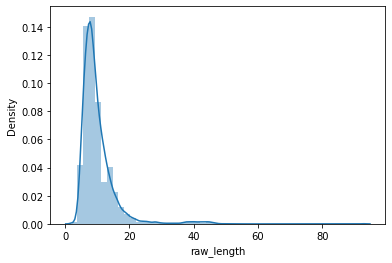

In [8]:
sns.distplot(df['raw_length'])

### Let us see the distribution of Phishing V/S Non-Phishing URLS

In [13]:
df.PhishingResult.value_counts()

1    37175
0    36400
Name: PhishingResult, dtype: int64

In [14]:
(df.PhishingResult.value_counts()/len(df))*100

1    50.526673
0    49.473327
Name: PhishingResult, dtype: float64

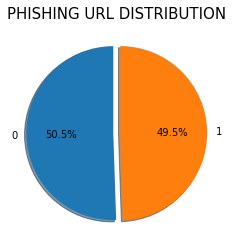

In [16]:
isPhishing = df['PhishingResult'].value_counts()
labels = df.PhishingResult.unique()
plt.pie(isPhishing,labels=labels,autopct="%1.1f%%",shadow=True,explode=(0.04,0.04),startangle=90)
plt.title('PHISHING URL DISTRIBUTION',fontsize=15)
plt.show()

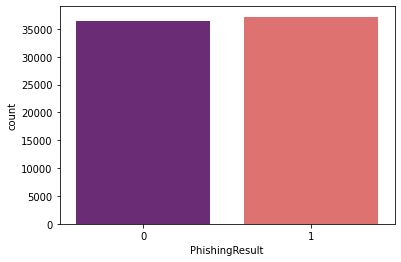

In [18]:
sns.countplot(x='PhishingResult', data=df, palette = 'magma')

### Heatmap for our  data to find the correlation between length of word and Phishing URL

In [19]:
word_count = df.filter(['largestWord', 'smallestWord', 'avgWord', 'PhishingResult', 'sd of words'], axis = 1)
word_count.corr()

,largestWord,smallestWord,avgWord,PhishingResult,sd of words
largestWord,1.000000,-0.026779,0.909320,0.126680,0.993345
smallestWord,-0.026779,1.000000,0.110185,-0.110468,-0.008430
avgWord,0.909320,0.110185,1.000000,0.133215,0.932838
PhishingResult,0.126680,-0.110468,0.133215,1.000000,0.130559
sd of words,0.993345,-0.008430,0.932838,0.130559,1.000000


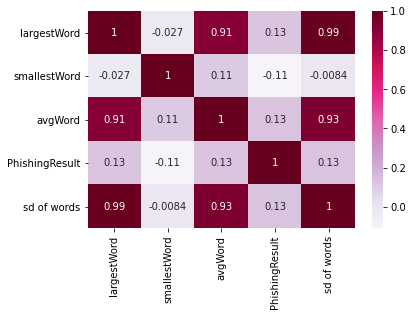

In [20]:
sns.heatmap(word_count.corr(), cmap = 'PuRd', annot = True)

### Let us analyse the distribution of top level domains in phishing urls

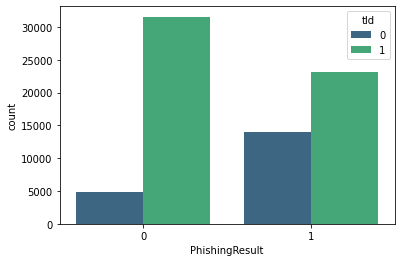

In [21]:
sns.countplot(x="PhishingResult", data=df,hue = 'tld', palette='viridis')

#### We can see that a majority of the Phishing sites have a top level domain in their url

### Let us see the relation between Secured Sites (HTTPS Enabled) and Phishing URLs

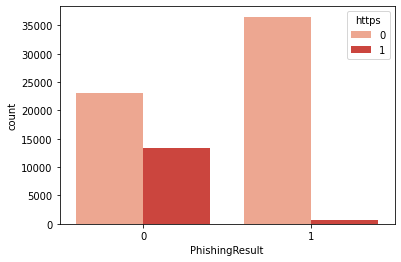

In [23]:
sns.countplot(x="PhishingResult", data=df,hue = 'https', palette='Reds')

#### Therefore we can see that most Phishing urls don't have HTTPs

### Let us see the relation between 'www' and Phishing URLs


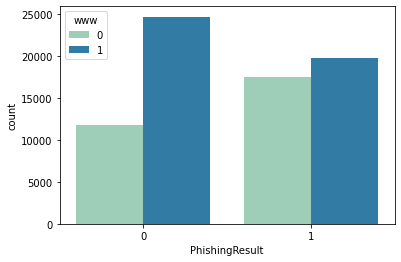

In [24]:
sns.countplot(x="PhishingResult", data=df,hue = 'www', palette='YlGnBu')

#### Therefore we can see that most Phishing urls don't have 'www'

### Let us see the relation between '.com' and Phishing URLs


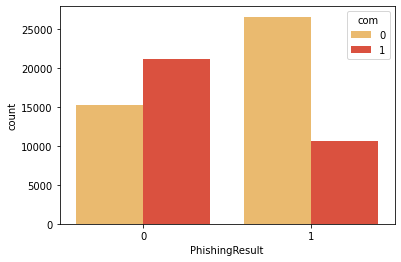

In [26]:
sns.countplot(x="PhishingResult", data=df,hue = 'com', palette='YlOrRd')

#### Therefore we can see that a majority of Phishing urls have '.com'

### Now, let us analyse the relation between brand name and phishing urls

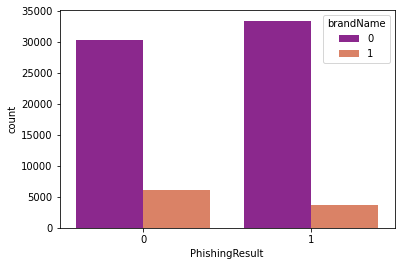

In [27]:
sns.countplot(x="PhishingResult", data=df,hue = 'brandName', palette='plasma')

#### It is observed that a majority of Phishing URLs do not have a brandname in it.

### Let us see if secured sites have any relation with the domain length

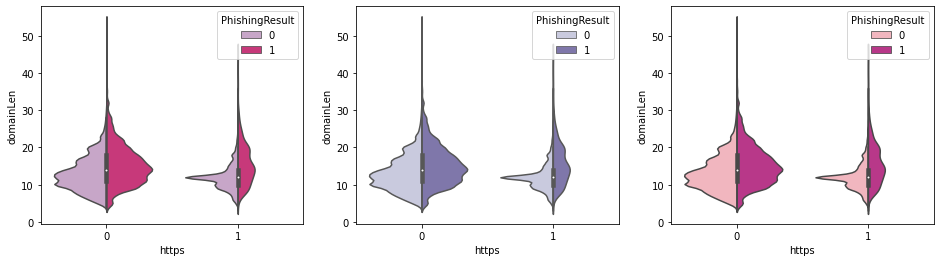

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.violinplot(x="https", y='domainLen', data=df,hue='PhishingResult',split=True,palette='PuRd', ax = ax[0])
sns.violinplot(x="https", y='domainLen', data=df,hue='PhishingResult',split = True, 
               palette='Purples', ax = ax[1])
sns.violinplot(x="https", y='domainLen', data=df,hue='PhishingResult',split = True, 
               palette='RdPu', ax = ax[2])

### Now, let us find the correlation between special characters and Phishing URLs and draw a heatmap

In [29]:
special_char = df.filter(['underscore', 'dash', 'equal', 'slash', 'at', 'ampersand', 'question', 'PhishingResult'], axis = 1)
special_char.corr()

,underscore,dash,equal,slash,at,ampersand,question,PhishingResult
underscore,1.000000,0.215570,0.246470,0.188530,0.025867,0.151525,0.195265,-0.092989
dash,0.215570,1.000000,0.137271,0.176953,0.066007,0.087739,0.107451,-0.101406
equal,0.246470,0.137271,1.000000,0.171111,0.268790,0.895812,0.650059,-0.155469
slash,0.188530,0.176953,0.171111,1.000000,0.023600,0.120120,0.096727,-0.556958
at,0.025867,0.066007,0.268790,0.023600,1.000000,0.183209,0.363380,-0.001101
ampersand,0.151525,0.087739,0.895812,0.120120,0.183209,1.000000,0.524625,-0.136096
question,0.195265,0.107451,0.650059,0.096727,0.363380,0.524625,1.000000,-0.044847
PhishingResult,-0.092989,-0.101406,-0.155469,-0.556958,-0.001101,-0.136096,-0.044847,1.000000


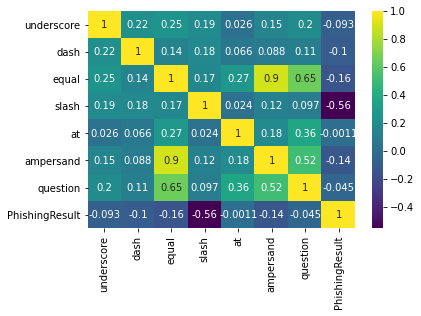

In [31]:
sns.heatmap(special_char.corr(), cmap = 'viridis', annot = True)

### Let us see if 'http', 'www', '.com' , count of keywords, presence of a top level domain and phishing sites are correlated

In [32]:
urltype = df.filter(['https', 'www', 'com', 'brandName', 'PhishingResult', 'keyword Count','tld'], axis = 1)
urltype.corr()

,https,www,com,brandName,PhishingResult,keyword Count,tld
https,1.000000,0.045341,0.060197,0.332758,-0.445378,-0.438151,0.194763
www,0.045341,1.000000,0.173113,-0.051482,-0.151070,0.324168,0.722791
com,0.060197,0.173113,1.000000,-0.103981,-0.299806,0.014870,0.137912
brandName,0.332758,-0.051482,-0.103981,1.000000,-0.099490,-0.132680,0.072595
PhishingResult,-0.445378,-0.151070,-0.299806,-0.099490,1.000000,0.295893,-0.279037
keyword Count,-0.438151,0.324168,0.014870,-0.132680,0.295893,1.000000,0.077364
tld,0.194763,0.722791,0.137912,0.072595,-0.279037,0.077364,1.000000


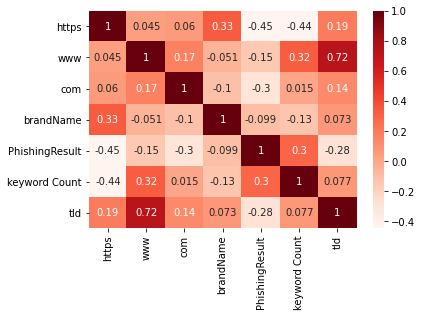

In [33]:
sns.heatmap(urltype.corr(), cmap = 'Reds', annot = True)

### Now let us examine the relation between domain length and raw length

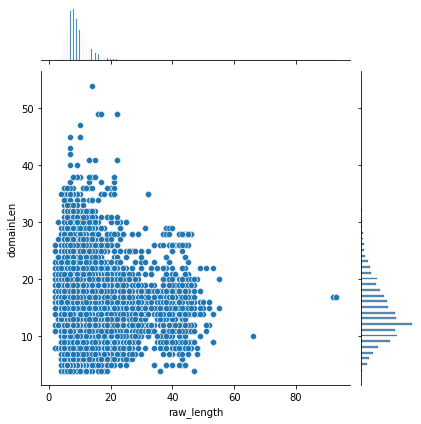

In [35]:
sns.jointplot(x='raw_length',y='domainLen',data=df,kind='scatter')